In [2]:
import pandas as pd
import numpy as np

#Read data
df=pd.read_parquet('/content/drive/MyDrive/bicing_full.parquet')
variables=['station_id','month','day','hour','weekend','weekday','is_holiday','season','percentage_docks_available','ctx_1','ctx_2','ctx_3','ctx_4','post_code','lon','lat','altitude','capacity','avg_temp', 'max_temp', 'min_temp', 'avg_rel_humidity','acum_precipitation']
df=df[variables]
df=df[::20]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714643 entries, 0 to 14292840
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   station_id                  714643 non-null  uint16  
 1   month                       714643 non-null  uint8   
 2   day                         714643 non-null  uint8   
 3   hour                        714643 non-null  uint8   
 4   weekend                     714643 non-null  bool    
 5   weekday                     714643 non-null  uint8   
 6   is_holiday                  714643 non-null  bool    
 7   season                      714643 non-null  category
 8   percentage_docks_available  714643 non-null  float32 
 9   ctx_1                       714643 non-null  float32 
 10  ctx_2                       714643 non-null  float32 
 11  ctx_3                       714643 non-null  float32 
 12  ctx_4                       714643 non-null  float32 
 1

In [ ]:
df

,station_id,month,day,hour,weekend,weekday,is_holiday,season,percentage_docks_available,ctx_1,...,post_code,lon,lat,altitude,capacity,avg_temp,max_temp,min_temp,avg_rel_humidity,acum_precipitation
0,1,3,28,21,False,4,False,spring,0.033333,0.150000,...,8013,2.180107,41.397980,16,46,13.100000,17.600000,9.225,51.25,0.000000
25,1,3,30,0,True,6,False,spring,0.034483,0.189655,...,8013,2.180107,41.397980,16,46,12.300000,16.750000,8.700,67.00,0.000000
50,1,3,31,9,True,7,False,spring,0.034483,0.068966,...,8013,2.180107,41.397980,16,46,12.700000,15.750000,10.200,74.00,0.000000
75,1,4,1,12,False,1,False,spring,0.966667,0.966667,...,8013,2.180107,41.397980,16,46,14.025000,18.174999,11.200,58.00,0.000000
100,1,4,2,13,False,2,False,spring,0.066667,0.133333,...,8013,2.180107,41.397980,16,46,14.475000,18.575001,11.575,70.00,0.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14292750,519,12,27,14,False,2,False,winter,0.958333,0.958333,...,8032,2.166289,41.424656,110,24,13.600000,18.674999,10.350,74.50,0.000000
14292775,519,12,28,15,False,3,False,winter,0.958333,0.833333,...,8032,2.166289,41.424656,110,24,12.750000,17.700001,9.425,75.25,0.000000
14292800,519,12,29,16,False,4,False,winter,0.739130,0.791667,...,8032,2.166289,41.424656,110,24,13.450000,18.674999,9.575,62.50,0.000000
14292825,519,12,30,20,False,5,False,winter,0.937500,0.958333,...,8032,2.166289,41.424656,110,24,15.250000,18.299999,11.800,62.00,0.000000


In [3]:
 #function that transforms time data into cyclic variables, using sin and cos

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [4]:

#transform time data using the defined encode function
df=encode(df,'month',12)
df=encode(df,'day',31)
df=encode(df,'weekday',7)
df=encode(df,'hour',23)

In [5]:
#transfor station id and potcode into categorical variable
df['station_id'] = pd.Categorical(df.station_id)
df['post_code'] = pd.Categorical(df.post_code)

In [6]:
df=df.drop(['month','day','weekday','hour'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571715 entries, 0 to 14292850
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   station_id                  571715 non-null  category
 1   weekend                     571715 non-null  bool    
 2   is_holiday                  571715 non-null  bool    
 3   season                      571715 non-null  category
 4   percentage_docks_available  571715 non-null  float32 
 5   ctx_1                       571715 non-null  float32 
 6   ctx_2                       571715 non-null  float32 
 7   ctx_3                       571715 non-null  float32 
 8   ctx_4                       571715 non-null  float32 
 9   post_code                   571715 non-null  category
 10  lon                         571715 non-null  float32 
 11  lat                         571715 non-null  float32 
 12  altitude                    571715 non-null  uint16  
 1

In [7]:
## divide using the scikit learn function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
#separate the target variable

x_train = train_set.drop(["percentage_docks_available"], axis=1) # drop labels for training set
y_train =  train_set["percentage_docks_available"].copy()

x_test=test_set.drop(["percentage_docks_available"], axis=1) # drop labels for training set
y_test=test_set["percentage_docks_available"].copy()

###Pipeline

In [9]:
#create a pipeline to transform categorical data and to transform numerical data and  normalize numerical data
#import libraries
#categorical variables
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer


In [11]:
#encoding of categorical variables
cat_pipeline = Pipeline([
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

In [12]:
#standardization of numerial variables
numerical_pipeline=Pipeline([
    ('standardize',StandardScaler()),])

In [13]:
#logaritmic transofrmation of data
log_pipeline = Pipeline([
  ('log_transform',FunctionTransformer(np.log1p)),])

In [14]:
#create a pipeline and apply to train and test
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

cat_attribs = ['station_id','season','post_code']
standardize_features = ['month_cos','month_sin','day_cos','day_sin','hour_cos','hour_sin','weekend','weekday_cos','weekday_sin','is_holiday','lon','lat','capacity','avg_temp', 'max_temp', 'min_temp', 'avg_rel_humidity','ctx_1','ctx_2','ctx_3','ctx_4','altitude','acum_precipitation']
log_transform=['ctx_1','ctx_2','ctx_3','ctx_4','altitude','acum_precipitation']

full_pipeline = ColumnTransformer([
        ('cat', cat_pipeline, cat_attribs),
        ('log_transform',log_pipeline,log_transform),
        ('num',numerical_pipeline,standardize_features),
        ])

bicing_prepared = full_pipeline.fit_transform(x_train)

test_prepared = full_pipeline.fit_transform(x_test)

###Model: neural network

Define the model

In [15]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout
from keras.optimizers import Adam

ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=12,input_dim=bicing_prepared.shape[1],activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=12,input_dim=bicing_prepared.shape[1], activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1,activation='sigmoid'))   # Adding Output Layer
#compile the model
ann.compile(optimizer="adam",loss="mean_squared_error")
ann.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                6984      
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 7,153
Trainable params: 7,153
Non-trainable params: 0
_________________________________________________________________


Fit the model

In [19]:
X_train=bicing_prepared.toarray()
X_test=test_prepared.toarray()

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
history=ann.fit(x=X_train, y=y_train, epochs=12, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/12
17867/17867 [==============================] - 53s 3ms/step - loss: 0.0161 - val_loss: 0.0151
Epoch 2/12
17867/17867 [==============================] - 50s 3ms/step - loss: 0.0149 - val_loss: 0.0148
Epoch 3/12
17867/17867 [==============================] - 47s 3ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 4/12
17867/17867 [==============================] - 47s 3ms/step - loss: 0.0146 - val_loss: 0.0148
Epoch 5/12
17867/17867 [==============================] - 46s 3ms/step - loss: 0.0145 - val_loss: 0.0145
Epoch 6/12
17867/17867 [==============================] - 42s 2ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 7/12
17867/17867 [==============================] - 42s 2ms/step - loss: 0.0144 - val_loss: 0.0146
Epoch 8/12
17867/17867 [==============================] - 47s 3ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 9/12
17867/17867 [==============================] - 47s 3ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 10/12
17867/17867 [==============================

Model performance

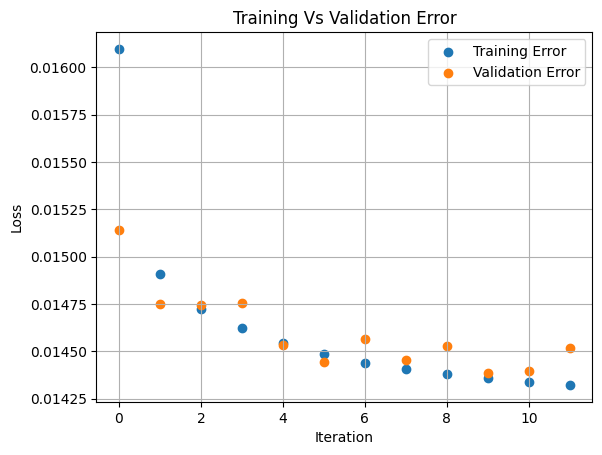

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x=history.epoch,y=history.history['loss'],label='Training Error')
plt.scatter(x=history.epoch,y=history.history['val_loss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

Calculate model error


In [22]:
#make predictions
import numpy as np
trainPredict = ann.predict(X_train)
testPredict = ann.predict(X_test)
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,testPredict))
print ("MSE:",metrics.mean_squared_error(y_test,testPredict))
print("RMSE train:",np.sqrt(metrics.mean_squared_error(y_train,trainPredict)))
print("RMSE test:",np.sqrt(metrics.mean_squared_error(y_test,testPredict)))

4467/4467 [==============================] - 6s 1ms/step
MAE: 0.07882642
MSE: 0.014515995
RMSE train: 0.119696535
RMSE test: 0.12048234


Kaggle submission

In [23]:
# Preprocess the test data the same way we have done with the train set.
#sRead data
submission=pd.read_parquet('/content/drive/MyDrive/data_submission.parquet')

#transform time data
submission=encode(submission,'month',12)
submission=encode(submission,'day',31)
submission=encode(submission,'weekday',7)
submission=encode(submission,'hour',23)
submission=submission.drop(['month','day','weekday','hour'],axis=1)

submission = submission.rename(columns={'ctx-1': 'ctx_1', 'ctx-2': 'ctx_2','ctx-3': 'ctx_3','ctx-4': 'ctx_4'})

#apply pipeline
X = full_pipeline.transform(submission)
X=X.toarray()

# Predict bike availability: apply model
y = ann.predict(X)

# Generate submission to kaggle
df_output = pd.DataFrame(y)
df_output = df_output.reset_index()
df_output.columns = ['index','percentage_docks_available']

df_output.to_csv('/content/drive/MyDrive/result_model7.csv',index=False)

1719/1719 [==============================] - 3s 2ms/step
